In [116]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torch.utils.data import random_split

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [82]:
def fn(x):
    return ((2*x[:, 0].unsqueeze(1)) + 3) + (3 * x[:, 1].unsqueeze(1))

In [83]:
def noise(shape, low=-1.0, high=1.0):
    return (high - low) * torch.rand(shape) + low

def fn(x):
    # return np.sin(x) + noise(x.shape, low=0, high=1)
    # return np.sin(x) #+ noise(x.shape, low=0, high=1)
    # return x*10 #+ noise(x.shape, low=0, high=1)

    noise = torch.rand(x.shape[0], 1)
    return torch.sin(x[:, 0].unsqueeze(1)) + torch.cos(x[:, 1].unsqueeze(1)) + noise # x[:, 0] are xs; x[:, 0] are the ys
    # return ((2*x[:, 0].unsqueeze(1)) + 3) + (3 * x[:, 1].unsqueeze(1))

class x_y_ds(Dataset):
    def __init__(self, fn, N):
        # self.xs = torch.linspace(min, max, N).unsqueeze(1)
        # self.ys = fn(self.xs)

        self.xs = torch.rand(N, 2)
        self.ys = fn(self.xs)

    def __len__(self):
        return len(self.ys)

    def __getitem__(self, idx):
        return self.xs[idx], self.ys[idx]
    
data = x_y_ds(fn, N = 100)
training_dataset, test_dataset = random_split(
    data, [80, 20]
)
    
train_dataloader = DataLoader(dataset = training_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(dataset = test_dataset, batch_size=10, shuffle=False)

In [84]:
def loss_fn(y_hat, y):
    return (y_hat - y)**2

def loss_grad(y_hat, y):
    return 2 * (y_hat - y)

In [113]:
lr = 0.01
ws = torch.tensor([0.5, 0.6])
b = torch.tensor([0.5])

ws_history = []
loss_history = []

epochs = 100
for epoch in range(epochs):
    epoch_loss_train = 0
    num_batches = 0
    # ws_epoch = torch.zeros((2))
    for x_batch, y_batch in train_dataloader:
        bs = y_batch.shape[0]
        y_hat = (x_batch @ ws).unsqueeze(1) + b # prediction
        losses_train = loss_fn(y_hat, y_batch).mean() # loss
        epoch_loss_train += losses_train
        # updation
        delta = loss_grad(y_hat, y_batch)
        ws -= lr * (x_batch.T @ delta).squeeze() / bs
        b -= lr * delta.mean()

        # torch.concat((ws_epoch, ws), dim = 0)
        ws_history.append(ws.detach().clone())
        loss_history.append(losses_train.item())
        num_batches += 1
    # ws_history.append(ws)

    epoch_loss_train /= num_batches

    # testing
    epoch_loss_test = 0
    num_batches = 0
    for x_batch, y_batch in test_dataloader:
        bs = y_batch.shape[0]
        y_hat = (x_batch @ ws).unsqueeze(1) + b # prediction
        losses_test = loss_fn(y_hat, y_batch).mean() # loss
        epoch_loss_test += losses_test
        num_batches += 1
    epoch_loss_test /= num_batches

    if epoch % 5 == 0:
            print(f"Epoch {epoch} | train loss = {epoch_loss_train:.4f} | test loss = {epoch_loss_test:.4f}")
        

Epoch 0 | train loss = 0.7299 | test loss = 0.2837
Epoch 5 | train loss = 0.2460 | test loss = 0.1968
Epoch 10 | train loss = 0.1918 | test loss = 0.2356
Epoch 15 | train loss = 0.1778 | test loss = 0.2426
Epoch 20 | train loss = 0.1677 | test loss = 0.2383
Epoch 25 | train loss = 0.1586 | test loss = 0.2287
Epoch 30 | train loss = 0.1512 | test loss = 0.2197
Epoch 35 | train loss = 0.1443 | test loss = 0.2097
Epoch 40 | train loss = 0.1383 | test loss = 0.2011
Epoch 45 | train loss = 0.1326 | test loss = 0.1929
Epoch 50 | train loss = 0.1276 | test loss = 0.1862
Epoch 55 | train loss = 0.1235 | test loss = 0.1795
Epoch 60 | train loss = 0.1193 | test loss = 0.1746
Epoch 65 | train loss = 0.1160 | test loss = 0.1696
Epoch 70 | train loss = 0.1130 | test loss = 0.1641
Epoch 75 | train loss = 0.1105 | test loss = 0.1604
Epoch 80 | train loss = 0.1076 | test loss = 0.1563
Epoch 85 | train loss = 0.1055 | test loss = 0.1513
Epoch 90 | train loss = 0.1033 | test loss = 0.1485
Epoch 95 | tra

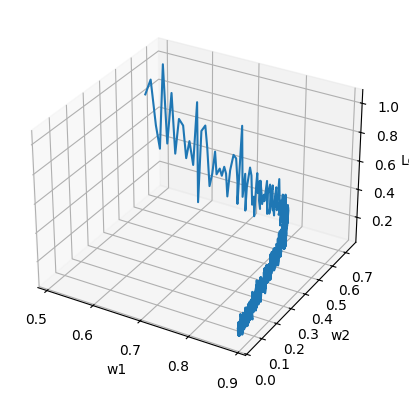

In [117]:
w1_vals = [w[0].item() for w in ws_history]
w2_vals = [w[1].item() for w in ws_history]
loss_vals = loss_history

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(w1_vals, w2_vals, loss_vals)

ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("Loss")

plt.show()